In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
! ls

gdrive	sample_data


In [ ]:
# What's in my Datasets folder in Drive
! ls '/content/gdrive/My Drive/Datasets/'

mydask.png  old-newspaper.tsv


In [ ]:
# I'm in my google drive directory now, no need to copy the file
% cd '/content/gdrive/My Drive/Datasets/'

/content/gdrive/My Drive/Datasets


In [ ]:
# Copying the .tsv file into the working directory that Colab reads
#! cp '/content/gdrive/My Drive/Datasets/old-newspaper.tsv' . 

In [ ]:
! pwd

/content/gdrive/My Drive/Datasets


# Computing efficiency

In [ ]:
import timeit

In [ ]:
previous = 'import pandas as pd'
code = '''
data = pd.read_csv('old-newspaper.tsv', sep='\t')
'''  

print('Pandas takes', timeit.timeit(code, setup=previous, number=1), 'seconds to read the file')

Pandas takes 171.05883930200002 seconds to read the file


In [ ]:
# it works
!pip install "dask[dataframe]"

     |████████████████████████████████| 112kB 6.1MB/s 


In [ ]:
previous = 'import dask.dataframe as dd'
code = '''
data = dd.read_csv('old-newspaper.tsv', sep='\t')
'''
print('Dask takes', timeit.timeit(code, setup=previous, number=1), 'seconds to read the file')

Dask takes 0.2366430559999344 seconds to read the file


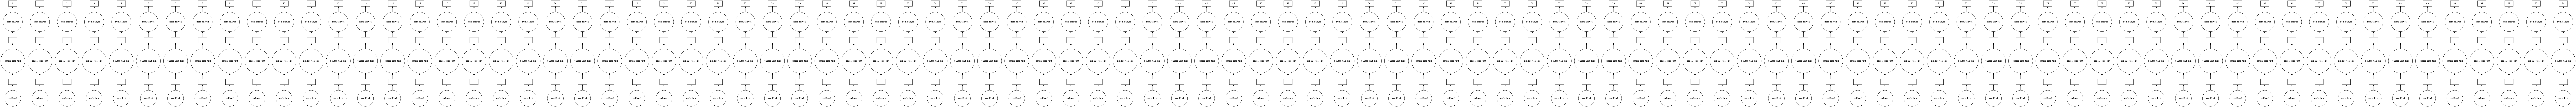

In [ ]:
#data.visualize()

In [ ]:
# Restart runtime and it works
# try assigning dask as below cell
#!pip install modin

     |████████████████████████████████| 583kB 7.6MB/s 
     |████████████████████████████████| 9.9MB 12.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.3 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
# this worked finally
!pip install modin[ray]

     |████████████████████████████████| 583kB 5.9MB/s 
     |████████████████████████████████| 9.9MB 8.8MB/s 
     |████████████████████████████████| 48.5MB 83kB/s 
     |████████████████████████████████| 17.2MB 205kB/s 
     |████████████████████████████████| 204kB 38.4MB/s 
     |████████████████████████████████| 3.1MB 48.4MB/s 
     |████████████████████████████████| 1.3MB 36.5MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 133kB 51.0MB/s 
     |████████████████████████████████| 71kB 4.9MB/s 
     |████████████████████████████████| 296kB 50.6MB/s 
     |████████████████████████████████| 143kB 37.9MB/s 
     |████████████████████████████████| 92kB 5.7MB/s 
  Created wheel for gpustat: filename=gpustat-0.6.0-cp37-none-any.whl size=12621 sha256=6e9f9814f845b700b09c16e071af468ed4d582e6947f8efea638a4a19ce9fdc0
  Stored in directory: /root/.cache/pip/wheels/48/b4/d5/fb5b7f1d040f2ff206

In [ ]:
# it raising ram usage problems, execute again
previous = 'import modin.pandas as pd'
code = '''
data = pd.read_csv('old-newspaper.tsv', sep='\t')
'''
print('Modin (Dask) takes', timeit.timeit(code, setup=previous, number=1), 'seconds to read the file')

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()

(pid=656) tcmalloc: large alloc 3012354048 bytes == 0x562025fb0000 @  0x7f559f37a1e7 0x562023110f48 0x5620230db9c7 0x5620231bd3fe 0x5620230deee9 0x5620231d099d 0x562023152fe9 0x56202314db0e 0x56202301fe2b 0x5620231501e6 0x56202301fd14 0x7f559c10b0ef 0x7f559c1a4756 0x7f559c1130b3 0x7f559c2640c7 0x7f559c1f16a2 0x7f559c2988c8 0x7f559c1f40b2 0x7f559c1f210c 0x7f559c761031 0x7f559c761c89 0x7f559c763fe7 0x7f559c274718 0x7f559c10e807 0x5620230def41 0x5620231d099d 0x562023152fe9 0x5620230e069a 0x56202314ec9e 0x56202314db0e 0x56202314d813
(pid=655) tcmalloc: large alloc 3012354048 bytes == 0x559e278fa000 @  0x7f96929211e7 0x559e24240f48 0x559e2420b9c7 0x559e242ed3fe 0x559e2420eee9 0x559e2430099d 0x559e24282fe9 0x559e2427db0e 0x559e2414fe2b 0x559e242801e6 0x559e2414fd14 0x7f968f6b20ef 0x7f968f74b756 0x7f968f6ba0b3 0x7f968f80b0c7 0x7f968f7986a2 0x7f968f83f8c8 0x7f968f79b0b2 0x7f

KeyboardInterrupt: ignored

In [ ]:
# it works
!pip install -U ray

(pid=877) tcmalloc: large alloc 3012354048 bytes == 0x55d11ddc2000 @  0x7fcaa404b1e7 0x55d11b39ef48 0x55d11b3699c7 0x55d11b44b3fe 0x55d11b36cee9 0x55d11b45e99d 0x55d11b3e0fe9 0x55d11b3dbb0e 0x55d11b2ade2b 0x55d11b3de1e6 0x55d11b2add14 0x7fcaa0ddc0ef 0x7fcaa0e75756 0x7fcaa0de40b3 0x7fcaa0f350c7 0x7fcaa0ec26a2 0x7fcaa0f698c8 0x7fcaa0ec50b2 0x7fcaa0ec310c 0x7fcaa1432031 0x7fcaa1432c89 0x7fcaa1434fe7 0x7fcaa0f45718 0x7fcaa0ddf807 0x55d11b36cf41 0x55d11b45e99d 0x55d11b3e0fe9 0x55d11b36e69a 0x55d11b3dcc9e 0x55d11b3dbb0e 0x55d11b3db813


     |████████████████████████████████| 47.5MB 86kB/s 
  Found existing installation: ray 1.1.0
    Uninstalling ray-1.1.0:
      Successfully uninstalled ray-1.1.0


In [ ]:
previous = '''
import pandas as pd
import ray

ray.init()
'''
code = '''
data = pd.read_csv('old-newspaper.tsv', sep='\t')
'''
print('Running Ray takes', timeit.timeit(code, setup=previous, number=1), 'seconds to read the file')

2021-03-31 15:09:04,116	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8265


Running Ray takes 180.25933383400024 seconds to read the file


## Data Validation

In [ ]:
import dask.dataframe as dd

In [ ]:
data = dd.read_csv('old-newspaper.tsv', sep='\t')

In [ ]:
data.head()

,Language,Source,Date,Text
0,Afrikaans,republikein.com.na,2011/09/14,Die veranderinge aan die Britsgeboude Avensis ...
1,Afrikaans,republikein.com.na,2011/01/20,Duitsland se mans- en vrouespanne is die afgel...
2,Afrikaans,sake24.com,2009/11/28,"Mnr. Estienne de Klerk, uitvoerende direkteur ..."
3,Afrikaans,sake24.com,2009/11/12,Mustek is se finansiële-resultate-advertensie ...
4,Afrikaans,sake24.com,2011/02/04,nadat LMS se raad van trustees in Junie verled...


In [ ]:
data.tail()

,Language,Source,Date,Text
21471,Vietnamese,vneconomy.vn,2008/12/15,"Thêm nữa, hồ sơ pháp lý của khoản vay thiếu ch..."
21472,Vietnamese,laodong.com.vn,2011/06/14,"Khi “ngày tận thế” đến, chỉ có những người đọc..."
21473,Vietnamese,www.zing.vn,2009/04/18,"Thế rồi Yumi Hòa quen một chàng trên mạng, tất..."
21474,Vietnamese,www.vietnamnet.vn,2011/12/25,Cầm giấy báo điểm của con trai mà bố mẹ Minh N...
21475,Vietnamese,www.tienphong.vn,2011/12/04,Tuy là một trong những nước chống Syria hăng h...


AttributeError: ignored

In [ ]:
data.columns

Index(['Language', 'Source', 'Date', 'Text'], dtype='object')

In [ ]:
data.dtypes

Language    object
Source      object
Date        object
Text        object
dtype: object

In [ ]:
data['Language'].unique().compute()

0      Afrikaans
1       Albanian
2        Amharic
3         Arabic
4       Armenian
         ...    
61       Turkish
62      Ukranian
63          Urdu
64         Uzbek
65    Vietnamese
Name: Language, Length: 66, dtype: object

In [ ]:
data['Language'].value_counts().compute()

English                 1010242
Danish                   887016
Indonesian               781521
Chinese (Simplified)     682472
Korean                   667314
                         ...   
Khmer                     55674
Nepali                    54877
Malayalam                 40484
Icelandic                 39093
Amharic                   32553
Name: Language, Length: 66, dtype: int64

In [ ]:
data[data['Language']=='Spanish'].compute()

,Language,Source,Date,Text
53347,Spanish,UNKNOWN,UNKNOWN,"En este sentido, señala que «no podemos consen..."
53348,Spanish,UNKNOWN,UNKNOWN,"""Cuando acabe la experiencia con el Inter no m..."
53349,Spanish,UNKNOWN,UNKNOWN,"«Teniendo salud se aguanta todo», dice Nati Mi..."
53350,Spanish,UNKNOWN,UNKNOWN,'72 días': De Danilo &ScaronerbedÅ¾ija. Croaci...
53351,Spanish,UNKNOWN,UNKNOWN,La Administración norteamericana no ha dado aú...
...,...,...,...,...
19714,Spanish,UNKNOWN,UNKNOWN,Pero la Ley de Enjuiciamiento Civil autoriza l...
19715,Spanish,UNKNOWN,UNKNOWN,"¿Qué tal si salieran a sorteo público, como lo..."
19716,Spanish,UNKNOWN,UNKNOWN,«Queremos que los ciudadanos sean los vigilant...
19717,Spanish,UNKNOWN,UNKNOWN,"Berodia es duda y descartado está Tomás, que a..."


In [ ]:
if 'Catalan' in data['Language']:
  print('There are articles in catalan')

There are articles in catalan


In [ ]:
'Galician' in data['Language']

True

In [ ]:
'Euskera' in data['Language']

False

In [ ]:
data.isnull().sum(axis=0).compute()

Language    0
Source      0
Date        0
Text        0
dtype: int64

In [ ]:
data[data['Language']=='Spanish']['Source'].unique().compute()

0    UNKNOWN
Name: Source, dtype: object

In [ ]:
data[data['Text'] == 'UNKNOWN'].compute()

,Language,Source,Date,Text


In [ ]:
# good tips https://docs.dask.org/en/latest/dataframe-best-practices.html
# https://docs.dask.org/en/latest/dataframe-api.html
# https://www.kaggle.com/aman2000jaiswal/data-manipulation-with-dask-dataframe

In [ ]:
len(data['Date'])

16806041

In [ ]:
! pip install pyaml

In [ ]:
from pyaml import yaml

In [ ]:
with open('old newspapers.yaml', 'r') as f:
  yaml_file = yaml.safe_load(f)

print(yaml_file)

{'Columns': ['Language', 'Source', 'Date', 'Text'], 'Number of columns': 4, 'Number of rows': 16806041, 'Data types': 'object', 'File size (GB)': 6}


In [ ]:
type(yaml_file)

dict

In [ ]:
yaml_file['Columns'] == data.columns

array([ True,  True,  True,  True])

In [ ]:
yaml_file['Number of columns'] == data.shape[1]

True

In [ ]:
yaml_file['Number of rows'] == len(data['Language'])

True

In [ ]:
yaml_file['Data types'] == data.dtypes

Language    True
Source      True
Date        True
Text        True
dtype: bool

In [ ]:
# once this is validated, it should compress the file to .gz or simula
# write functions that validate different things like column names, n of cols, n of rows...
# if ok, then compress as gz, if ko, then rewrite code is necessary
# finally create function to extract basic info as indicated

In [ ]:
# read YAML
# function:
## read file
## validate column name and number of col
## validate number of rows
## validate size
## decide to compress or not

# create function to extract basic df stats (col, rows, ...) and write to file

In [ ]:
with open('config.yaml', 'r') as f:
  config_file = yaml.safe_load(f)

print(config_file)

{'File format': 'tsv', 'Separator': '\t', 'Columns': ['Language', 'Source', 'Date', 'Text'], 'Number of columns': 4, 'Max number of rows admitted': 20000000, 'Max size admitted': 10}


In [ ]:
def Pipeline(file_name: str) -> str:
  # 1. read the file using the YAML configuration file
  file_format = config_file['File format']
  data = dd.read_csv(f'{file_name}.{file_format}', sep = config_file['Separator'])

  # 2. validate columns
  if len(config_file['Columns']) == len(data.columns) and list(config_file['Columns']) == list(data.columns):
    control_1 = 1
  else:
    control_1 = 0

  # 3. validate number of rows
  if len(data.iloc[:,0]) < config_file['Max number of rows admitted']:
    control_2 = 1
  else:
    control_2 = 0
  
  # 4. validate size
  import os
  if os.path.getsize(f'{file_name}.{file_format}') < config_file['Max size admitted'] * 1e9:
    control_3 = 1
  else:
    control_3 = 0

  if control_1 + control_2 + control_3 == 3:
    return print('The file has passed the validation and can be compressed')
  else:
    print('The validation failed')

In [ ]:
Pipeline('old-newspaper')

The file has passed the validation and can be compressed


In [ ]:
def summary(file_name):

  file_format = config_file['File format']
  data = dd.read_csv(f'{file_name}.{file_format}', sep = config_file['Separator'])
  
  num_of_cols = len(data.columns)
  num_of_rows = len(data.iloc[:,0])
  import os
  file_size = os.path.getsize(f'{file_name}.{file_format}')

  return print(f'The file entered was {file_name}. It has {num_of_cols} columns and {num_of_rows} entries. It weighs {file_size / 1e9} GB.')

In [ ]:
summary('old-newspaper')

The file entered was old-newspaper. It has 4 columns and 16806041 entries. It weighs 6.024697599 GB.


In [ ]:
def compression(file_name, new_file_name, format):

  import csv

  file_format = config_file['File format']
  with open(f'{file_name}.{file_format}', 'r') as input_f:
    csv_reader = csv.reader(input_f, delimiter = config_file['Separator'])

    with open(f'{new_file_name}.{format}', 'w') as output_f:
      csv_writer = csv.writer(output_f, delimiter = '|')

      for line in csv_reader:
        csv_writer.writerow(line)
      
      import gzip

      with open(f'{new_file_name}.{format}', 'rb') as input_cf:
        gzip.GzipFile(f'{new_file_name}.gz', 'wb')

In [ ]:
compression('old-newspaper', 'new_file', 'csv')

In [ ]:
!pwd

/content/gdrive/My Drive/Datasets


In [ ]:
!ls

config.yaml  mydask.png  new_file.csv  new_file.gz  old-newspaper.tsv
